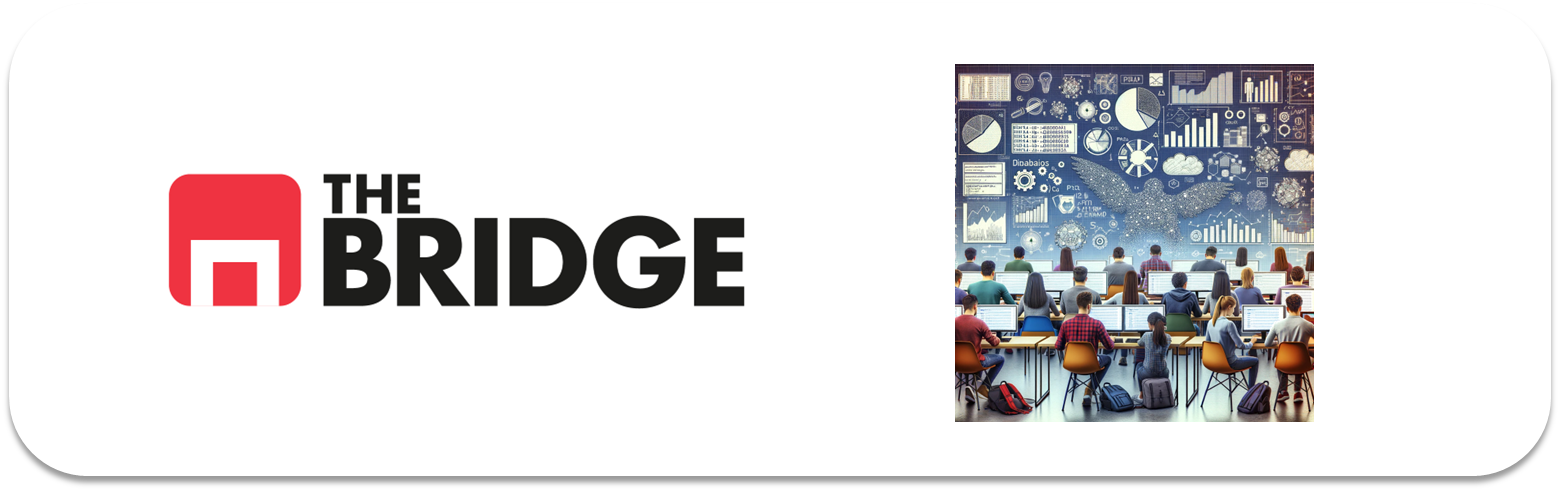

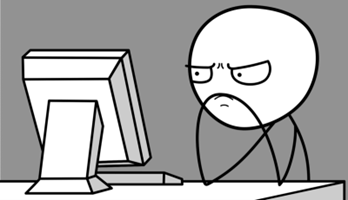

Para ejercitarte y afianzar lo aprendido sobre **Regularización**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import linear_model, metrics, model_selection
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import seaborn as sns

En estos ejercicios vamos a repasar la regularización sobre regresión lineal obteniendo primero un modelo de regresión lineal para predecir el precio de un coche y luego los equivalentes con penalizaciones L2 (Ridge), L1 (Lasso) y con la combinación de ambas (ElasticNet)

### Ejercicio 1

Carga el dataset de partida ("./data/CarPrice_Assignment.csv") en el que tenemos diferentes modelos de coches con sus características y el precio de estos. Échale un vistazo

In [3]:
df_car= pd.read_csv("./data/CarPrice_Assignment.csv")

In [4]:
df_car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df_car.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

### Ejercicio 2

Identifica la variable target y asignala a una variable de nombre `target`, luego elimina de forma permanente el campo "car_ID"

In [23]:
target = 'price'

In [8]:
df_car.drop(columns = 'car_ID')

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### Ejercicio 3

Haz un split del dataset en train y test al 80/20 empleando la función de sklearn que ya conoces

In [11]:
train_set, test_set = train_test_split(df_car, test_size=0.2, random_state=42)


### Ejercicio 4

Aunque vamos a emplear todas las variabes numéricas del dataset como predictores o features, obten la correlación de todas ellas con el target y escoge los que creas que son tus tres mejores predictores. Crea una lista con los nombres de las variables numéricas y llámalo `features_num`

In [12]:
#Variables numericas
df_car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


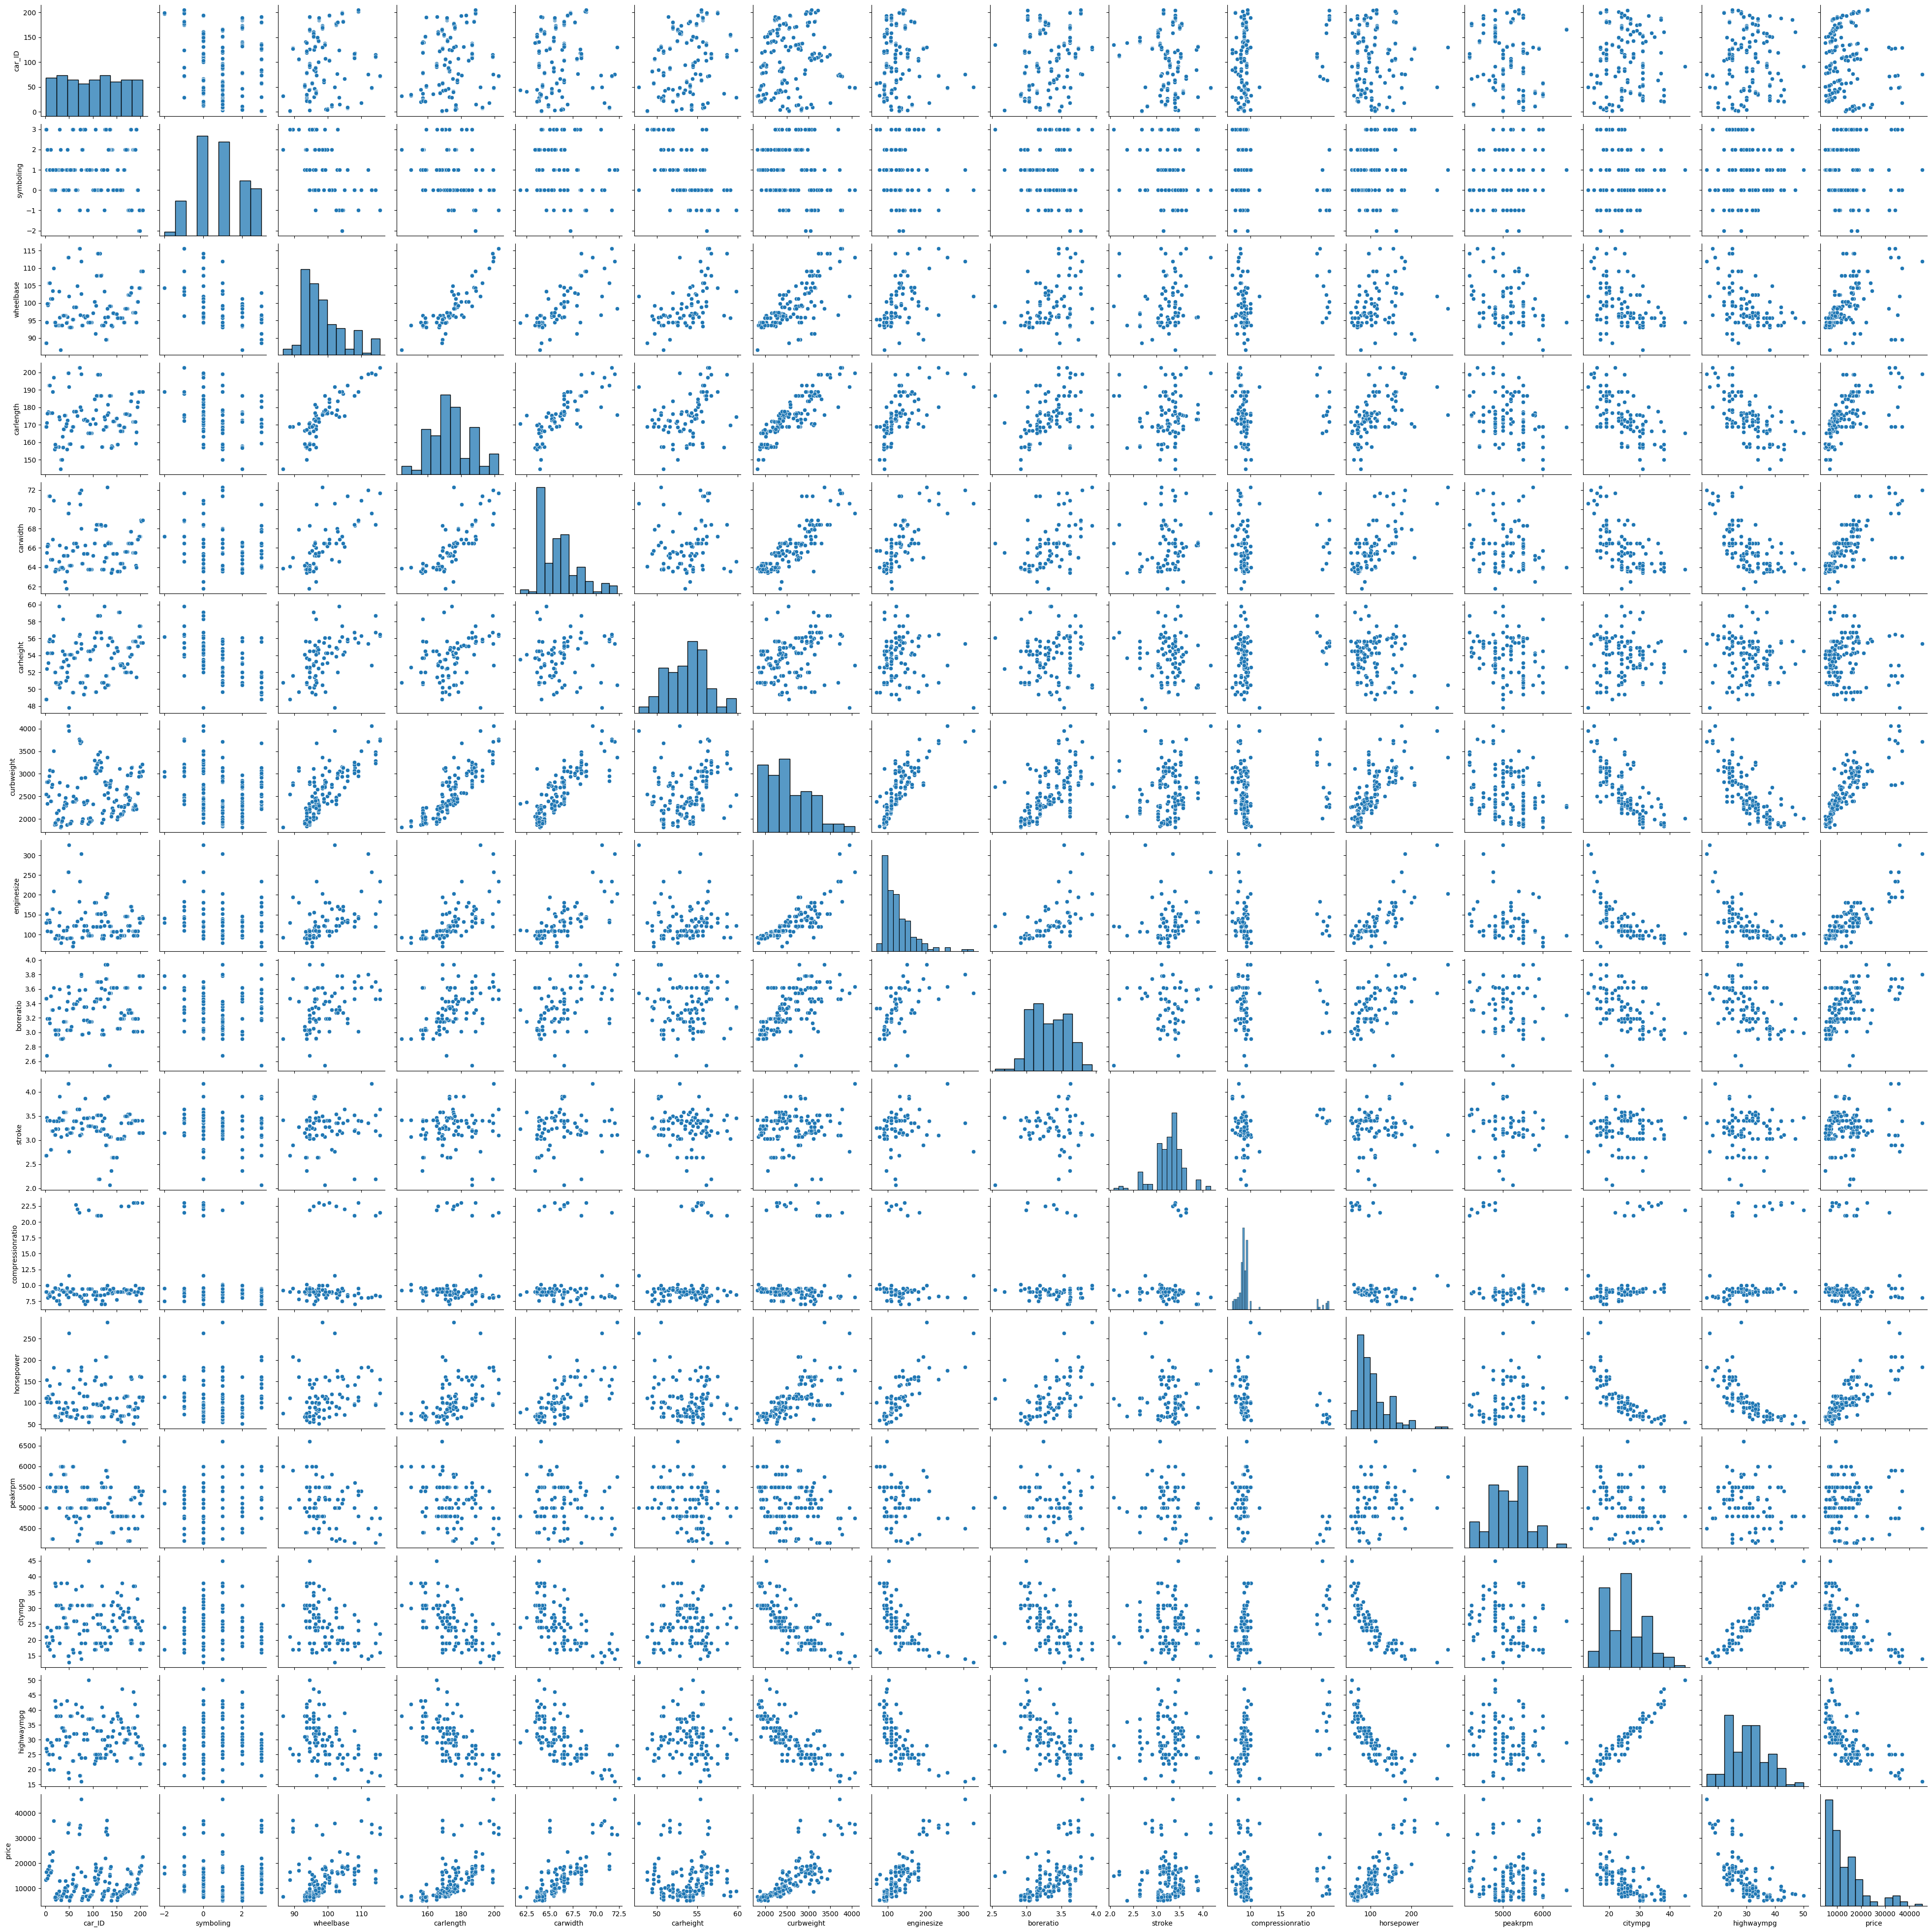

In [13]:
sns.pairplot(train_set)

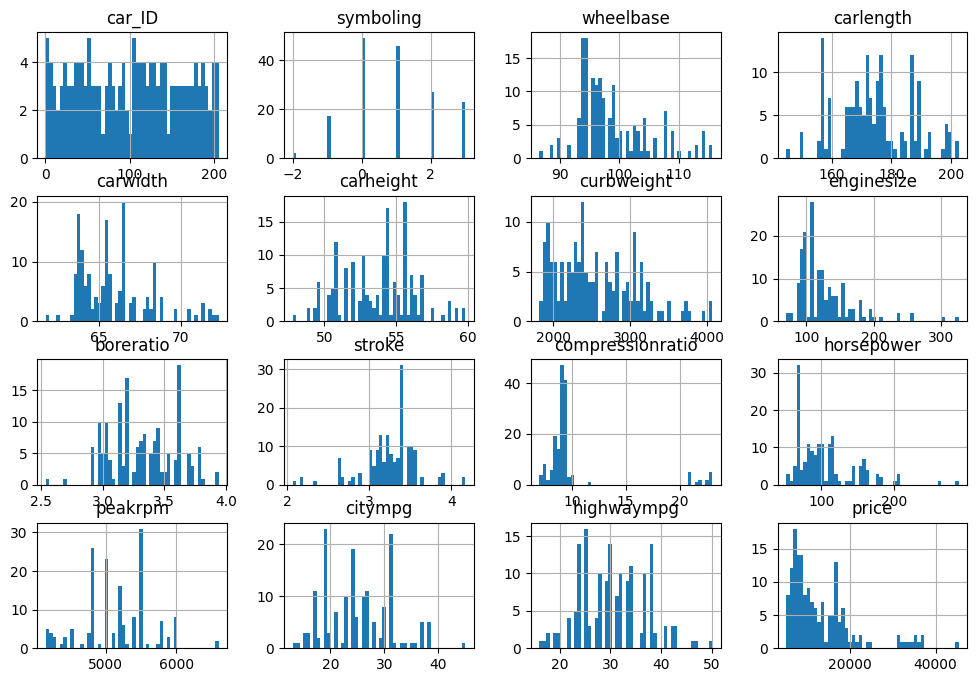

In [14]:
train_set.hist(bins=50, figsize=(12, 8)) # La forma de generar histogramas de una sola vez para las variables numéricas de un dataset
plt.show()

In [16]:
corr_matrix = train_set.corr(numeric_only= True)
corr_matrix

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.127075,0.142974,0.179696,0.071304,0.249383,0.113068,-0.003727,0.281138,-0.116890,0.171055,0.039555,-0.213326,0.019816,0.008566,-0.051834
symboling,-0.127075,1.000000,-0.528537,-0.335504,-0.186281,-0.537134,-0.184052,-0.039269,-0.070107,-0.061278,-0.180829,0.128578,0.281082,-0.109415,-0.028980,-0.005183
wheelbase,0.142974,-0.528537,1.000000,0.866698,0.764103,0.581916,0.745331,0.481618,0.433266,0.157902,0.251836,0.275268,-0.378718,-0.408155,-0.492094,0.506118
carlength,0.179696,-0.335504,0.866698,1.000000,0.823844,0.464789,0.865988,0.633826,0.557450,0.116709,0.161260,0.499984,-0.319409,-0.630014,-0.668099,0.652071
carwidth,0.071304,-0.186281,0.764103,0.823844,1.000000,0.234230,0.844845,0.703285,0.525516,0.145958,0.145192,0.615127,-0.212651,-0.623366,-0.653735,0.744310
carheight,0.249383,-0.537134,0.581916,0.464789,0.234230,1.000000,0.246243,-0.026308,0.129539,-0.049320,0.245437,-0.172079,-0.317616,0.003616,-0.061748,0.044458
curbweight,0.113068,-0.184052,0.745331,0.865988,0.844845,0.246243,1.000000,0.835859,0.625552,0.123118,0.123001,0.726687,-0.280475,-0.752704,-0.793748,0.824212
enginesize,-0.003727,-0.039269,0.481618,0.633826,0.703285,-0.026308,0.835859,1.000000,0.558890,0.162581,0.006985,0.804452,-0.243986,-0.654364,-0.671103,0.866433
boreratio,0.281138,-0.070107,0.433266,0.557450,0.525516,0.129539,0.625552,0.558890,1.000000,-0.064631,0.007323,0.551756,-0.272562,-0.563072,-0.561621,0.546099
stroke,-0.116890,-0.061278,0.157902,0.116709,0.145958,-0.049320,0.123118,0.162581,-0.064631,1.000000,0.162952,0.032248,-0.038711,-0.003988,-0.002718,0.023941


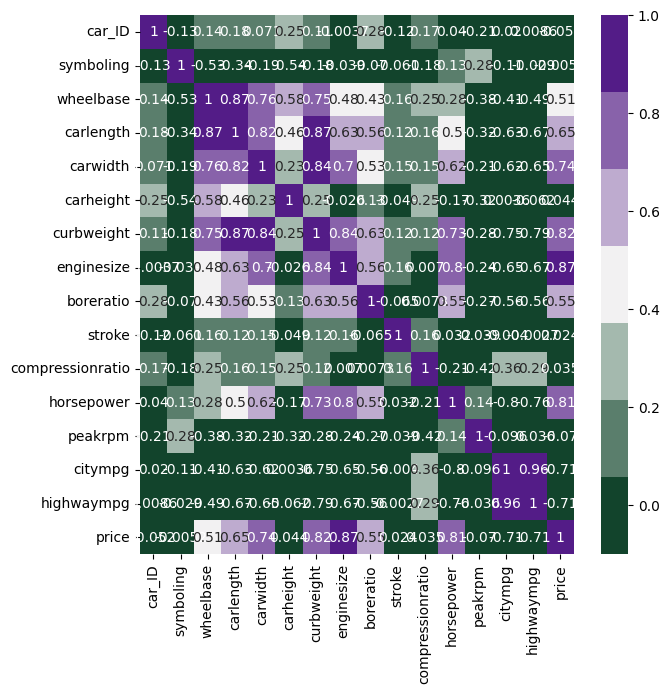

In [19]:
plt.figure(figsize=(7,7))
sns.heatmap(train_set.corr(numeric_only= True), 
           vmin=-0.1,
           vmax=1,
           cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
           annot=True);

In [33]:
features_num = train_set.drop(columns= [target]).describe().columns.to_list()


features_num

['car_ID',
 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

### Ejercicio 5

Completa el siguiente código que tiene como objetivo generar un modelo de regresión lineal utilizando todos los valores de las variables (salvo la target):

In [35]:
# Separación x e y
X_train = train_set.drop(columns= [target])
y_train = train_set[target]

X_test = test_set.drop(columns = [target])
y_test = test_set[target]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train[features_num]), columns= features_num)
X_test = pd.DataFrame(scaler.transform(X_test[features_num]), columns= features_num)

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)




LinearRegression()

### Ejercicio 6

Obten el MAE,RMSE y $R^2$ para las predicciones sobre train (X_train) y para las predicciones sobre test (X_test). ¿Podemos esperar una buena generalización?

In [39]:
predictions = lin_reg.predict(X_test)
predictions

array([28136.61662501, 17897.05420754, 10501.64869541, 14894.10445051,
       25867.1892059 ,  6173.84364331,  8980.28750149,  5919.21217674,
       11392.64574211,  9460.45070261, 14560.47727625,  5262.80065897,
       17528.77959034,  7491.46641038, 40299.85379014,  5336.56626822,
       -1096.23360087, 15347.30470178, 10145.97735703, 11163.54831384,
       11083.28073461, 22416.79275323,  6592.9098689 ,   938.10218382,
        6895.75103695, 27936.87659594, 12978.79601747, 16477.60756576,
        5956.53671362, 15851.60074806, 25165.44825207,  5672.24625495,
        6140.96330188, 23125.61626048,  8083.42458411, 24748.61143859,
       10938.04831201,  9709.93935657,  5425.3770443 , 15389.31688372,
        9064.98801667])

In [48]:
from sklearn import metrics

pred_train = lin_reg.predict(X_train)
print('MAE train', metrics.mean_absolute_error(y_train, pred_train))
print('MSE train', metrics.mean_squared_error(y_train, pred_train))
print('RMSE train', np.sqrt(metrics.mean_squared_error(y_train, pred_train)))
print('R2 train', lin_reg.score(X_train,y_train))

print('MAE Test', metrics.mean_absolute_error(y_test, predictions))
print('MSE Test', metrics.mean_squared_error(y_test, predictions))
print('RMSE Test', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 Test', lin_reg.score(X_test,y_test))

MAE train 2146.5092922082767
MSE train 8044673.748822727
RMSE train 2836.3134080744194
R2 train 0.8651078895307076
MAE Test 2411.093962409616
MSE Test 11710105.07880737
RMSE Test 3422.0030798944895
R2 Test 0.8516657126363216


### Ejercicio 7
 
Vamos a regularizar, crea un regresor Ridge con alpha inicial a 10 y entrenalo con el X_train. Obten MAE, RMSE y $R^2$ considerando las predicciones sobre el mismo X_train

### Ejercicio 8

Evalúalo contra el X_test y obten MAE,RMSE y $R^2$. ¿Es mejor generalizado que la regresión lineal sin regularizar?

### Ejercicio 9
 
Ahora crea un regresor Lasso con alpha inicial a 125 y entrenalo con el X_train. Obten MAE, RMSE y $R^2$ considerando las predicciones sobre el mismo X_train.

### Ejercicio 10

Evalúalo contra el X_test y obten MAE,RMSE y $R^2$. ¿Es mejor generalizado que los otros dos modelos?

### Ejercicio 11

Repite los ejercicios 9 y 10 con un regresos ElasticNet con alpha 0.2 y l1_ratio a 0.7. ¿Es mejor generalizando que el resto?

### Ejercicio 12

¿Qué podrías hacer para mejorar los regresores regularizados?

### EXTRA:

Utiliza la función siguiente para pintar la importancia de los coeficientes en cada uno de los cuatro modelos y observa el efecto de las penalizaciones de cada una de las regularizaciones:

In [49]:
def show_coefs(model, figsize=(10, 5)):
    df_coef = pd.DataFrame(model.coef_, index=model.feature_names_in_, columns=["coefs"])

    fig, ax = plt.subplots(1, 2, figsize=figsize)
    df_coef.plot(kind="barh", ax=ax[0], legend=False)
    df_coef.abs().sort_values(by="coefs").plot(kind="barh", ax=ax[1], legend=False)
    fig.suptitle("Model Coefficients")

    fig.tight_layout()

    return df_coef